In [1]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [2]:
#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id, season id
#competition_id=55, season_id=282
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

#print the first 5 matches listed
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [426]:
#create a variable for the team you want to look into
team="England"

#filter for only matches that the focus team played in
matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [428]:
#create a variable containing the first match id in the data frame
latest_match_id = matches_df.match_id.iloc[0]

#latest_match_id=3943043

In [430]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=latest_match_id)

#print the first 5 rows of data
events_df.head(5)

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [432]:
#print a list of columns available in the event data
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [435]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

In [324]:
#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

#get count for each player
f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

In [9]:
f3rd_passes_count

,player,0
0,Cole Palmer,1
1,Harry Kane,1
2,John Stones,2
3,Jordan Pickford,1
4,Jude Bellingham,1
5,Kyle Walker,4
6,Marc Guehi,1


In [10]:
#rename second column
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [11]:
f3rd_passes_count

,player,Passes
0,Cole Palmer,1
1,Harry Kane,1
2,John Stones,2
3,Jordan Pickford,1
4,Jude Bellingham,1
5,Kyle Walker,4
6,Marc Guehi,1


In [12]:
#get final third carries for focus team
f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

#rename second column
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [13]:
f3rd_carries_count

,player,Carries
0,Bukayo Saka,4
1,Cole Palmer,1
2,Harry Kane,1
3,John Stones,1
4,Jude Bellingham,4
5,Luke Shaw,1
6,Phil Foden,1


In [14]:
#combine dataframes
progressions_df=pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])

In [15]:
progressions_df

,player,Passes,Carries
0,Cole Palmer,1.0,1.0
1,Harry Kane,1.0,1.0
2,John Stones,2.0,1.0
3,Jordan Pickford,1.0,NaN
4,Jude Bellingham,1.0,4.0
5,Kyle Walker,4.0,NaN
6,Marc Guehi,1.0,NaN
7,Bukayo Saka,NaN,4.0
8,Luke Shaw,NaN,1.0
9,Phil Foden,NaN,1.0


In [16]:
#add 0 where value is NaN
progressions_df=progressions_df.fillna(0)

In [17]:
#add a new column with the total
progressions_df['total']=progressions_df['Passes']+progressions_df['Carries']

In [18]:
progressions_df.sort_values(by='total', ascending=False, inplace=True)

In [19]:
progressions_df

,player,Passes,Carries,total
4,Jude Bellingham,1.0,4.0,5.0
5,Kyle Walker,4.0,0.0,4.0
7,Bukayo Saka,0.0,4.0,4.0
2,John Stones,2.0,1.0,3.0
0,Cole Palmer,1.0,1.0,2.0
1,Harry Kane,1.0,1.0,2.0
3,Jordan Pickford,1.0,0.0,1.0
6,Marc Guehi,1.0,0.0,1.0
8,Luke Shaw,0.0,1.0,1.0
9,Phil Foden,0.0,1.0,1.0


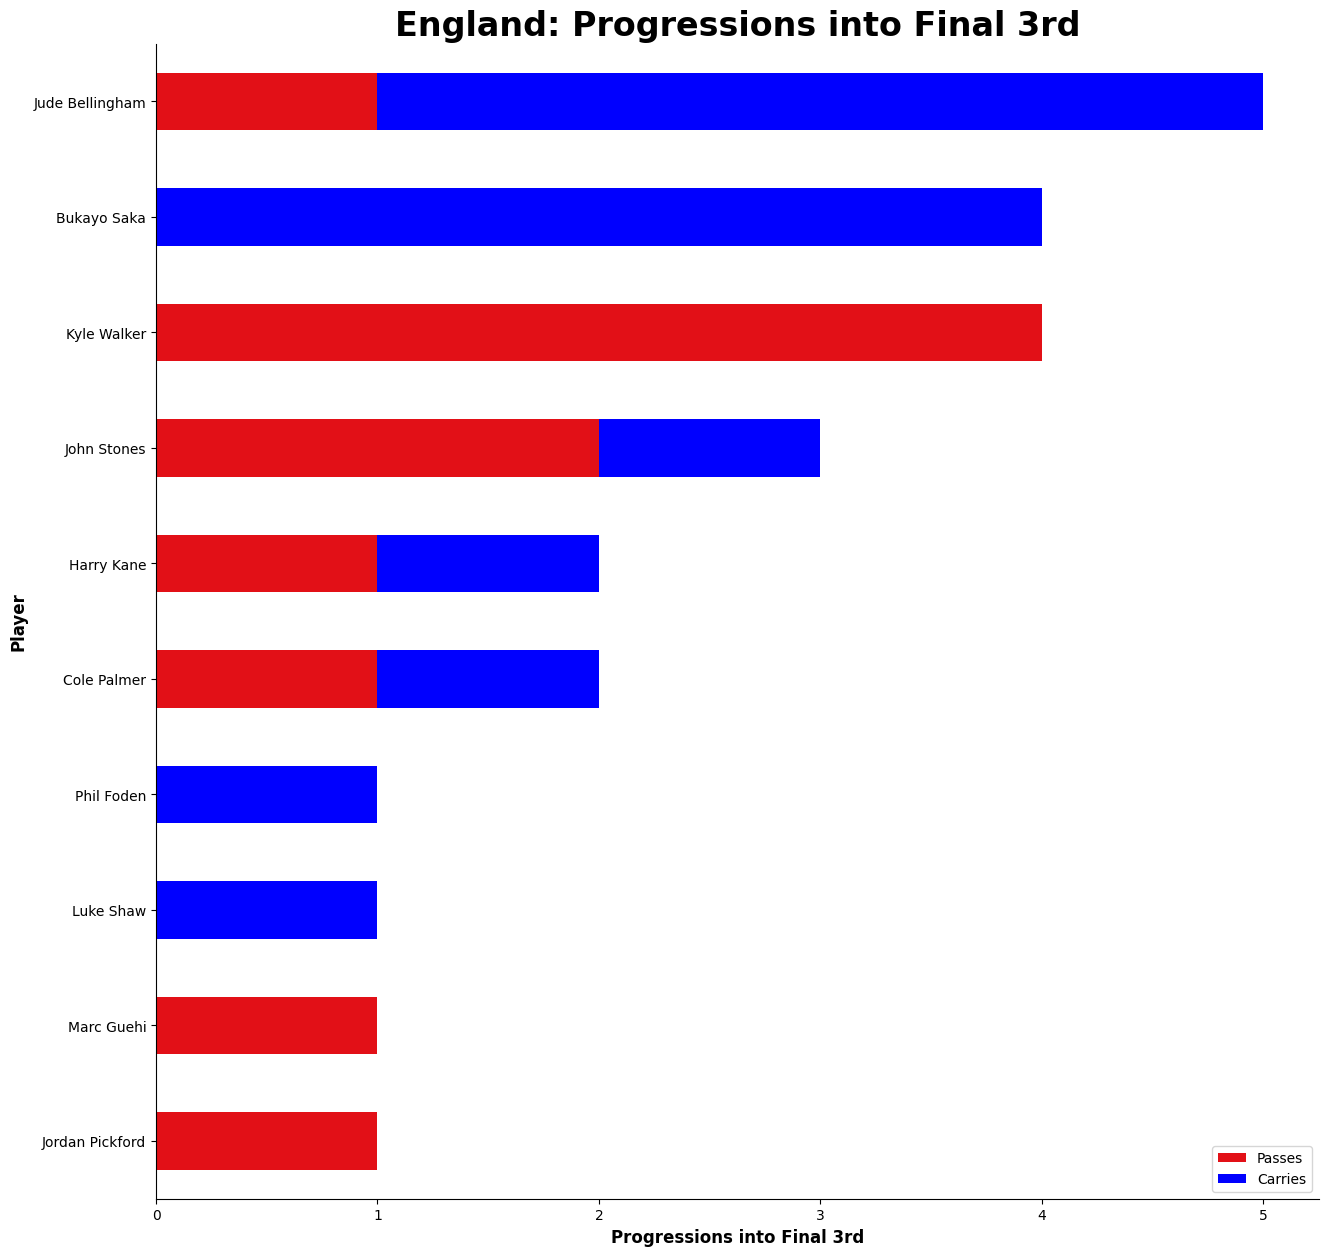

In [20]:
# Define colors
pass_colour = '#e21017'  # Red for passes
carry_colour = 'blue'    # Blue for carries

# Sort to get lowest values first
progressions_df.sort_values(by='total', ascending=True, inplace=True)

# Include only relevant columns
barchart_df = progressions_df[["player", "Passes", "Carries"]]

# Create the figure and axes, and set the face color
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('white')  # Set the figure background color to black

# Create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True, color=[pass_colour, carry_colour], legend=True, ax=ax)

# Add chart labels and title with white text to contrast the black background
ax.set_xlabel("Progressions into Final 3rd", fontdict={'fontsize': 12, 'weight': 'semibold', 'color': 'black'})
ax.set_ylabel("Player", fontdict={'fontsize': 12, 'weight': 'semibold', 'color': 'black'})
ax.set_title(f"{team}: Progressions into Final 3rd", fontdict={'fontsize': 24, 'weight': 'bold', 'color': 'black'})

# Set the axis background color to black
ax.set_facecolor('white')

# Adjust axis tick colors to white
ax.tick_params(colors='black')

# Remove top and right axes
sns.despine(top=True, right=True, left=False, bottom=False)

# Show the plot
plt.show()


In [21]:
fig.savefig('/Users/Trymso/Desktop/prog_eng.png', dpi=300, bbox_inches='tight')

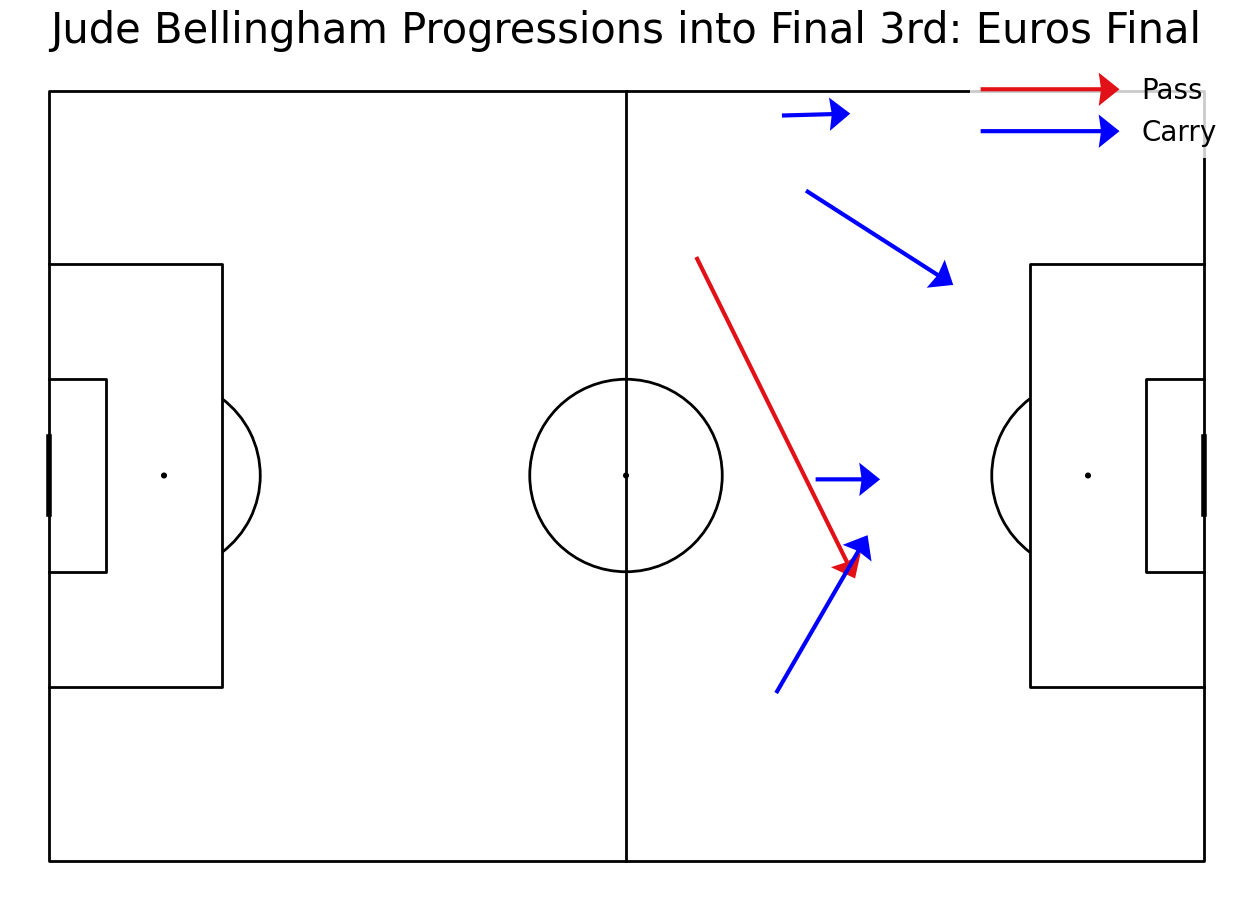

In [22]:
#visualise for a given player
player_name="Jude Bellingham"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Final', fontsize=30,color='black')

In [23]:
fig.savefig('/Users/Trymso/Desktop/prog_jude.png', dpi=300, bbox_inches='tight')

In [140]:
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [179]:
f3rd_reciepts=events_df[(events_df.team==team)&(events_df.type=="Ball Receipt*")&(events_df.x>80)&(events_df.ball_receipt_outcome.isna())]

#get count for each player
f3rd_reciepts_count=f3rd_reciepts.groupby('player').size().reset_index()

In [181]:
f3rd_reciepts_count

,player,0
0,Aymeric Laporte,1
1,Daniel Carvajal Ramos,17
2,Daniel Olmo Carvajal,14
3,Fabián Ruiz Peña,14
4,Lamine Yamal Nasraoui Ebana,26
5,Marc Cucurella Saseta,14
6,Martín Zubimendi Ibáñez,5
7,Mikel Oyarzabal Ugarte,4
8,Nicholas Williams Arthuer,28
9,Robin Aime Robert Le Normand,1


In [183]:
#rename second column
f3rd_reciepts_count.rename(columns={f3rd_reciepts_count.columns[1]: "Receptions" }, inplace = True)

In [185]:
f3rd_reciepts_count

,player,Receptions
0,Aymeric Laporte,1
1,Daniel Carvajal Ramos,17
2,Daniel Olmo Carvajal,14
3,Fabián Ruiz Peña,14
4,Lamine Yamal Nasraoui Ebana,26
5,Marc Cucurella Saseta,14
6,Martín Zubimendi Ibáñez,5
7,Mikel Oyarzabal Ugarte,4
8,Nicholas Williams Arthuer,28
9,Robin Aime Robert Le Normand,1


In [187]:
receptions_df=f3rd_reciepts_count

In [189]:
receptions_df

,player,Receptions
0,Aymeric Laporte,1
1,Daniel Carvajal Ramos,17
2,Daniel Olmo Carvajal,14
3,Fabián Ruiz Peña,14
4,Lamine Yamal Nasraoui Ebana,26
5,Marc Cucurella Saseta,14
6,Martín Zubimendi Ibáñez,5
7,Mikel Oyarzabal Ugarte,4
8,Nicholas Williams Arthuer,28
9,Robin Aime Robert Le Normand,1


<Figure size 1500x1500 with 0 Axes>

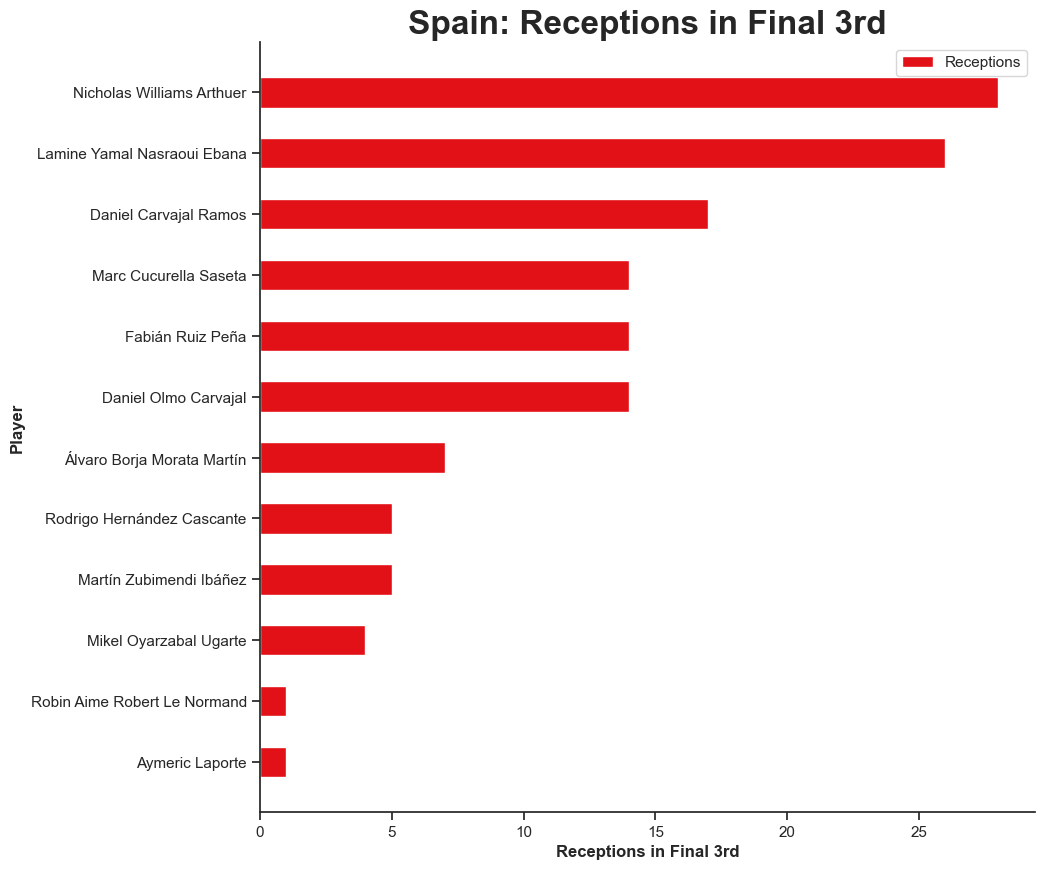

In [191]:
#create stacked bar chart
reception_colour='#e21017'
#carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
receptions_df.sort_values(by='Receptions', ascending=True, inplace=True)

#include only relevant columns
barchart_receptions=receptions_df[["player", "Receptions"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_receptions.set_index('player').plot(kind='barh', stacked=True,color=[reception_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Receptions in Final 3rd",fontdict = {'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Receptions in Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

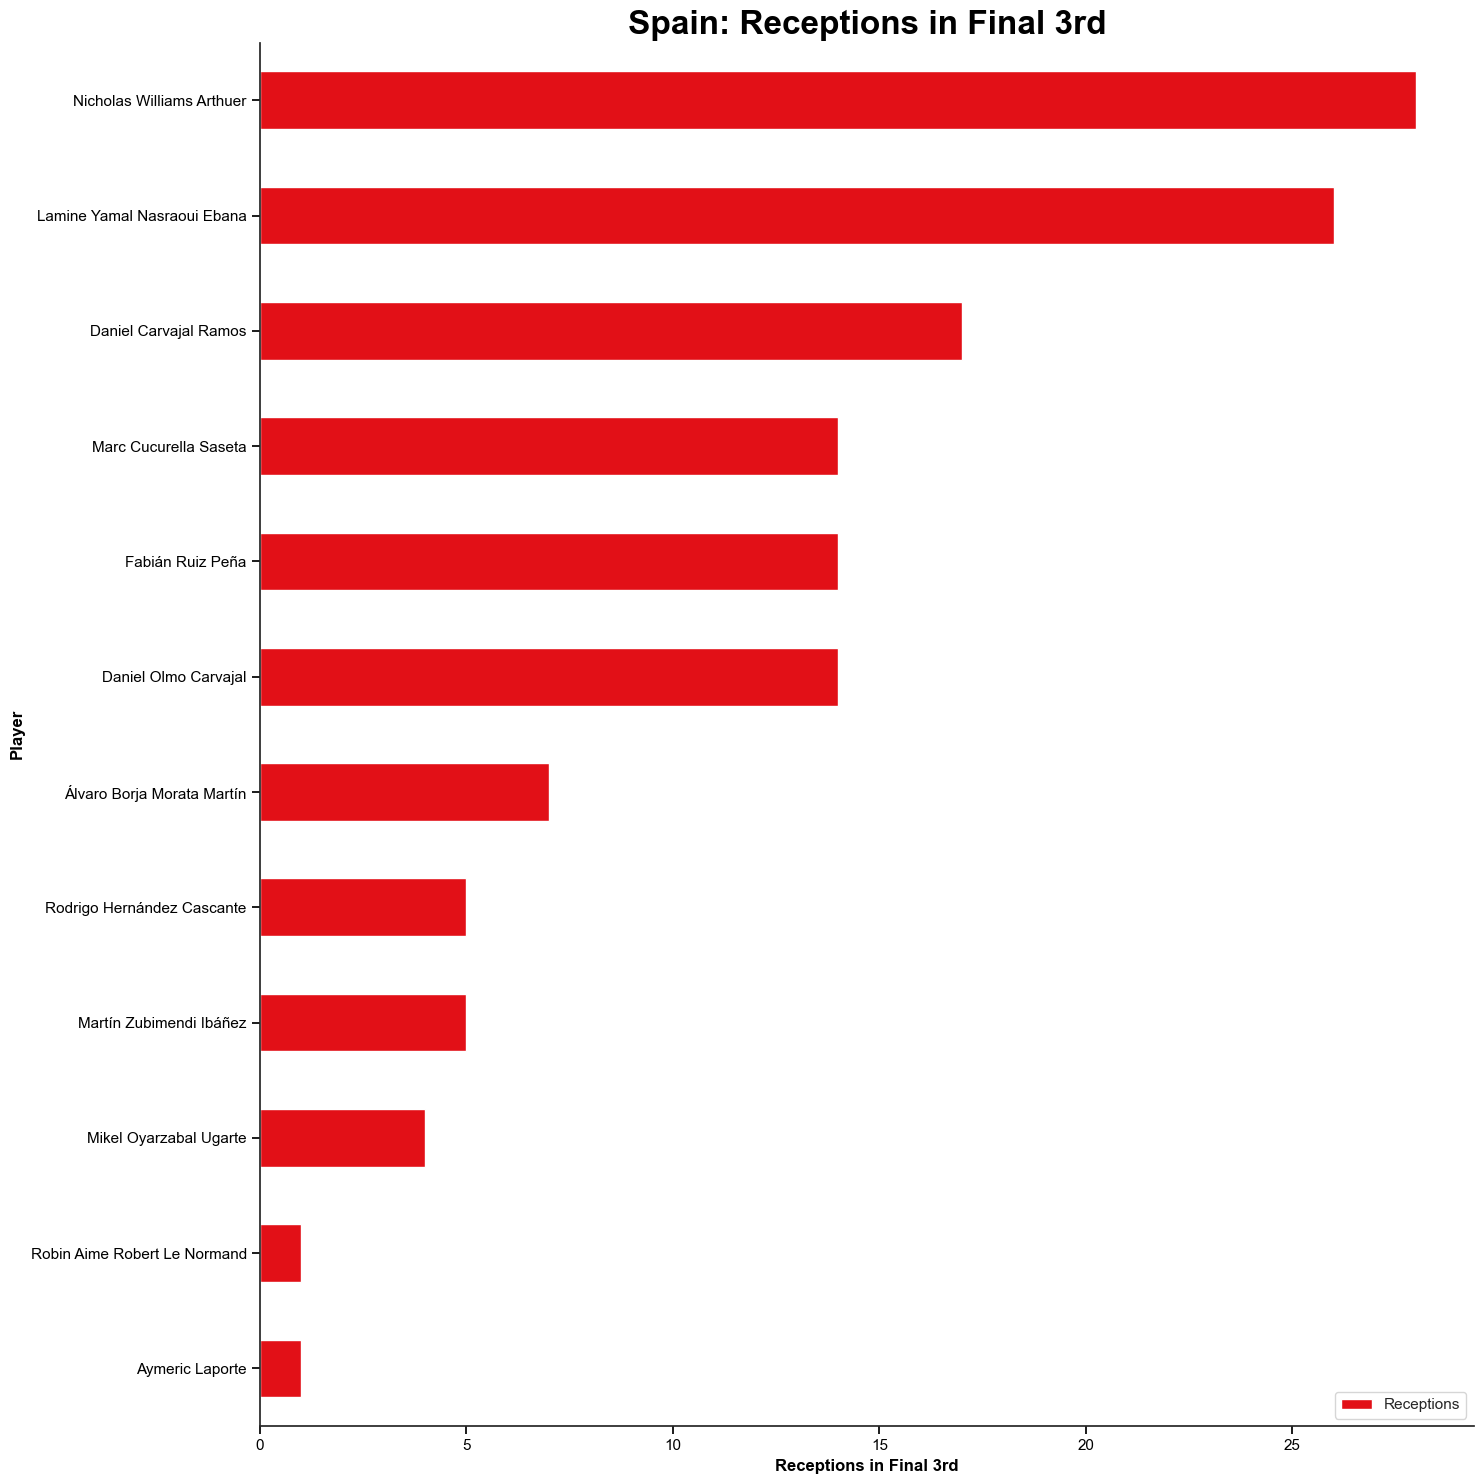

In [193]:
# Define colors
reception_colour = '#e21017'

# Sort the dataframe to get lowest values first (so that it plots in the correct order on our bar chart)
receptions_df.sort_values(by='Receptions', ascending=True, inplace=True)

# Include only relevant columns
barchart_receptions = receptions_df[["player", "Receptions"]]

# Create figure and axis for subplots
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('white')  # Set figure background color to black

# Create bar chart
barchart_receptions.set_index('player').plot(kind='barh', stacked=True, color=[reception_colour], legend=True, ax=ax)

# Add chart labels and title
ax.set_xlabel("Receptions in Final 3rd", fontdict={'fontsize': 12, 'weight': 'semibold', 'color': 'black'})
ax.set_ylabel("Player", fontdict={'fontsize': 12, 'weight': 'semibold', 'color': 'black'})
ax.set_title(f"{team}: Receptions in Final 3rd", fontdict={'fontsize': 24, 'weight': 'bold', 'color': 'black'})

# Adjust axis tick colors to white for visibility on black background
ax.tick_params(colors='black')

# Keep two axes visible
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Adjust layout for the plot to fit nicely
plt.tight_layout()

# Show the plot
plt.show()


In [195]:
# Save the figure to a file
fig.savefig('/Users/Trymso/Desktop/receptions_in_final_3rd.png', dpi=300, bbox_inches='tight')

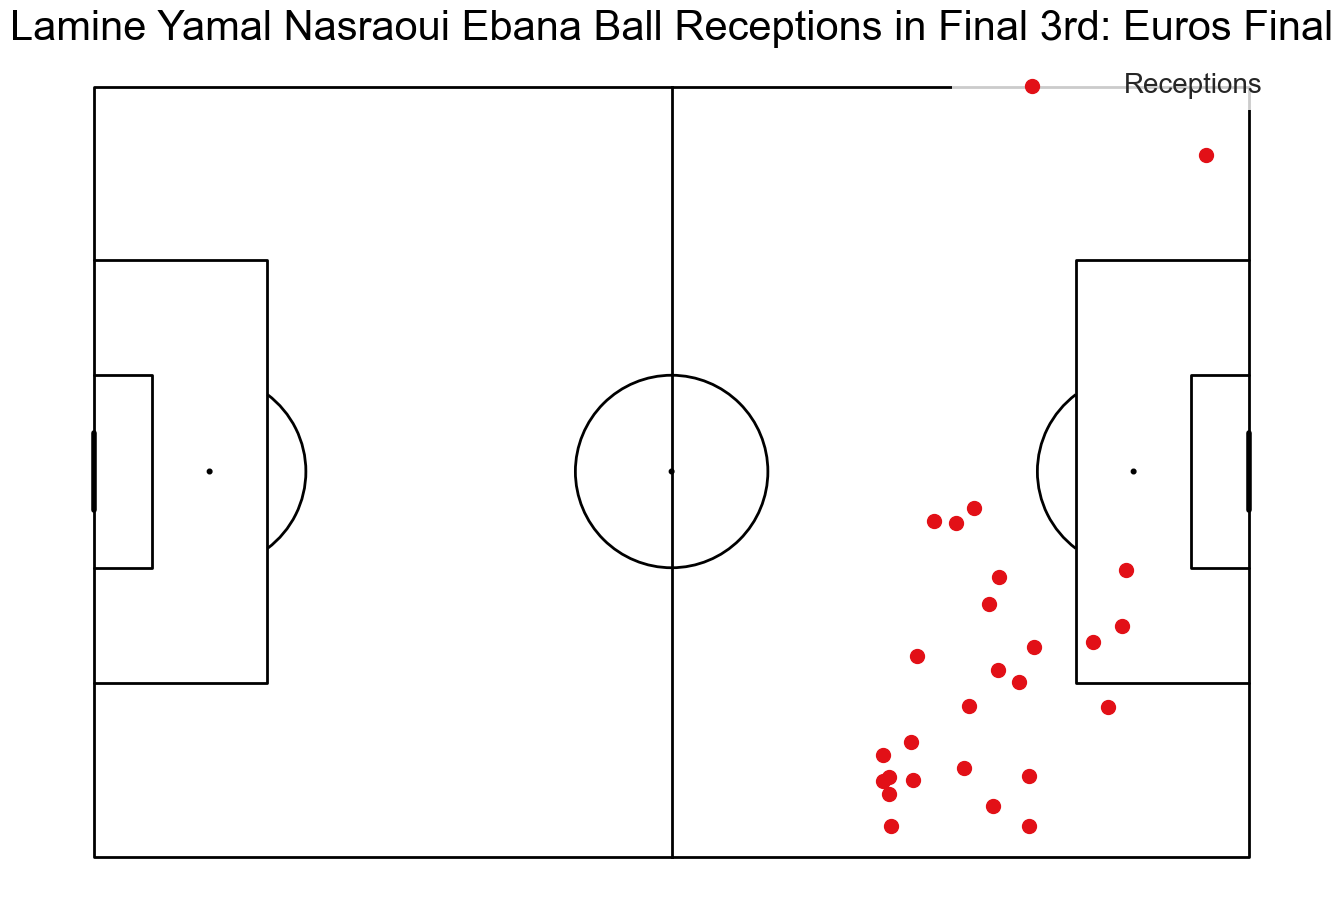

In [125]:
#visualise for a given player
player_name="Lamine Yamal Nasraoui Ebana"

player_receptions=f3rd_reciepts[(f3rd_reciepts.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

ax.scatter(player_receptions.x, player_receptions.y, 
           color=pass_colour, s=100, zorder=2, label="Receptions")

#plot the receptions
#ax.scatter(player_receptions.x, player_receptions.y,
#player_passes.pass_end_x, player_passes.pass_end_y, width=3,
#headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Receptions")

#plot the carries
#pitch.arrows(player_carries.x, player_carries.y,
#player_carries.carry_end_x, player_carries.carry_end_y, width=3,
#headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Ball Receptions in Final 3rd: Euros Final', fontsize=30,color='black')

In [127]:
fig.savefig('/Users/Trymso/Desktop/prog_Yamal.png', dpi=300, bbox_inches='tight')

In [123]:
events_df.player.unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Unai Simón Mendibil',
       'Robin Aime Robert Le Normand', 'Daniel Carvajal Ramos',
       'Álvaro Borja Morata Martín', 'Daniel Olmo Carvajal',
       'Jude Bellingham', 'Rodrigo Hernández Cascante', 'Aymeric Laporte',
       'Luke Shaw', 'Declan Rice', 'Marc Guehi', 'Phil Foden',
       'Kyle Walker', 'Lamine Yamal Nasraoui Ebana',
       'Marc Cucurella Saseta', 'Nicholas Williams Arthuer', 'Harry Kane',
       'Bukayo Saka', 'Fabián Ruiz Peña', 'John Stones',
       'Martín Zubimendi Ibáñez', 'Cole Palmer', 'Mikel Oyarzabal Ugarte',
       'José Ignacio Fernández Iglesias', 'Ollie Watkins', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

In [197]:
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [354]:
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [437]:
ball_recovery=events_df[(events_df.team==team)&(events_df.type=="Ball Recovery")&(events_df.x>80)&(events_df.ball_recovery_recovery_failure.isna())]
ball_recovery_count=ball_recovery.groupby('player').size().reset_index()
ball_recovery_count.rename(columns={ball_recovery_count.columns[1]: "Ball Recovery" }, inplace = True)

ball_recovery_count

,player,Ball Recovery
0,Bukayo Saka,2
1,Cole Palmer,1
2,Declan Rice,1
3,Jude Bellingham,4
4,Kobbie Mainoo,2
5,Kyle Walker,1
6,Marc Guehi,1
7,Ollie Watkins,1
8,Phil Foden,1


In [439]:
ball_pressure=events_df[(events_df.team==team)&(events_df.type=="Pressure")&(events_df.x>80)]
ball_pressure_count=ball_pressure.groupby('player').size().reset_index()
ball_pressure_count.rename(columns={ball_pressure_count.columns[1]: "Pressure" }, inplace = True)

ball_pressure_count

,player,Pressure
0,Bukayo Saka,4
1,Cole Palmer,3
2,Harry Kane,5
3,Jude Bellingham,8
4,Kobbie Mainoo,3
5,Luke Shaw,2
6,Ollie Watkins,5
7,Phil Foden,6


In [442]:
events_df.ball_receipt_outcome.unique()

array([nan, 'Incomplete'], dtype=object)

In [444]:
#ball_interception=events_df[(events_df.team==team)&(events_df.type=="Interception")&(events_df.interception_outcome.isna())]
#ball_interception_count=ball_interception.groupby('player').size().reset_index()
#ball_interception_count.rename(columns={ball_interception_count.columns[1]: "Interception"}, inplace=True)

#ball_interception_count

In [446]:
#combine dataframes
ballwins_df=pd.merge(ball_recovery_count, ball_pressure_count,
                    how="outer", on=["player"])

In [448]:
ballwins_df

,player,Ball Recovery,Pressure
0,Bukayo Saka,2.0,4.0
1,Cole Palmer,1.0,3.0
2,Declan Rice,1.0,NaN
3,Jude Bellingham,4.0,8.0
4,Kobbie Mainoo,2.0,3.0
5,Kyle Walker,1.0,NaN
6,Marc Guehi,1.0,NaN
7,Ollie Watkins,1.0,5.0
8,Phil Foden,1.0,6.0
9,Harry Kane,NaN,5.0


In [450]:
#add a new column with the total
ballwins_df['total']=ballwins_df['Ball Recovery']+ballwins_df['Pressure']
ballwins_df

,player,Ball Recovery,Pressure,total
0,Bukayo Saka,2.0,4.0,6.0
1,Cole Palmer,1.0,3.0,4.0
2,Declan Rice,1.0,NaN,NaN
3,Jude Bellingham,4.0,8.0,12.0
4,Kobbie Mainoo,2.0,3.0,5.0
5,Kyle Walker,1.0,NaN,NaN
6,Marc Guehi,1.0,NaN,NaN
7,Ollie Watkins,1.0,5.0,6.0
8,Phil Foden,1.0,6.0,7.0
9,Harry Kane,NaN,5.0,NaN


In [453]:
ballwins_df.sort_values(by='total', ascending=False, inplace=True)

In [455]:
ballwins_df

,player,Ball Recovery,Pressure,total
3,Jude Bellingham,4.0,8.0,12.0
8,Phil Foden,1.0,6.0,7.0
0,Bukayo Saka,2.0,4.0,6.0
7,Ollie Watkins,1.0,5.0,6.0
4,Kobbie Mainoo,2.0,3.0,5.0
1,Cole Palmer,1.0,3.0,4.0
2,Declan Rice,1.0,NaN,NaN
5,Kyle Walker,1.0,NaN,NaN
6,Marc Guehi,1.0,NaN,NaN
9,Harry Kane,NaN,5.0,NaN


In [457]:
#add 0 where value is NaN
ballwins_df=ballwins_df.fillna(0)
ballwins_df

,player,Ball Recovery,Pressure,total
3,Jude Bellingham,4.0,8.0,12.0
8,Phil Foden,1.0,6.0,7.0
0,Bukayo Saka,2.0,4.0,6.0
7,Ollie Watkins,1.0,5.0,6.0
4,Kobbie Mainoo,2.0,3.0,5.0
1,Cole Palmer,1.0,3.0,4.0
2,Declan Rice,1.0,0.0,0.0
5,Kyle Walker,1.0,0.0,0.0
6,Marc Guehi,1.0,0.0,0.0
9,Harry Kane,0.0,5.0,0.0


<Figure size 1500x1500 with 0 Axes>

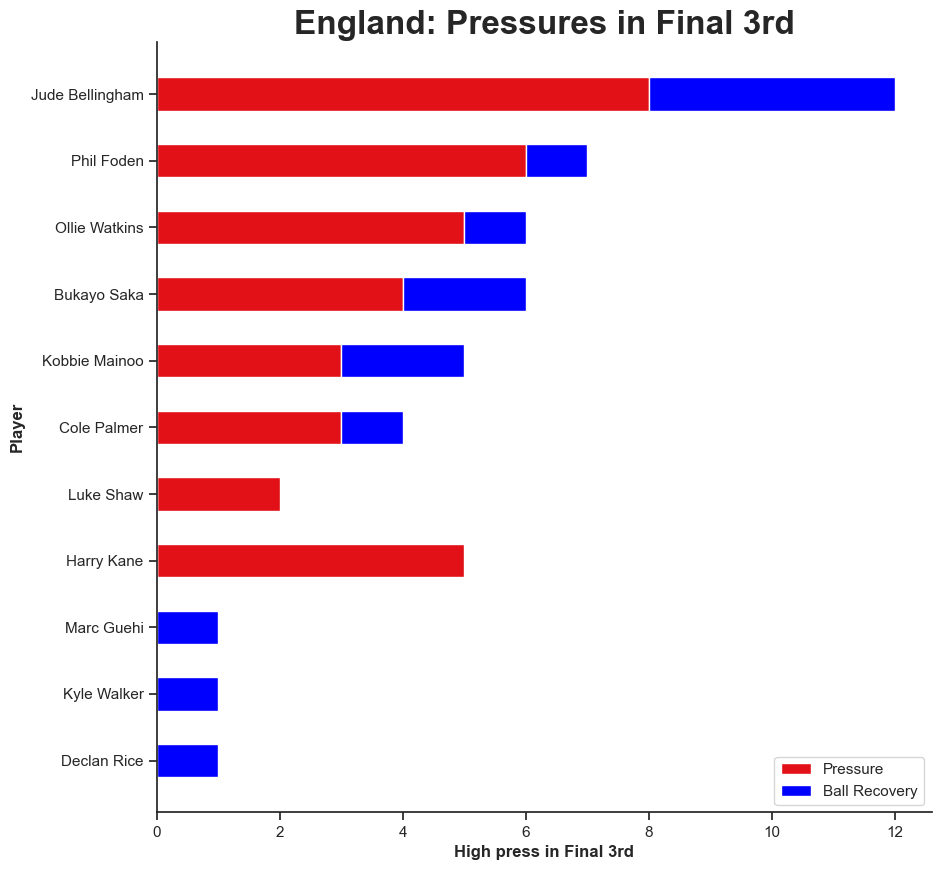

In [459]:
#create stacked bar chart
pass_colour='#e21017'
carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
ballwins_df.sort_values(by='total', ascending=True, inplace=True)

#include only relevant columns
barchart_ballwins=ballwins_df[["player", "Pressure", "Ball Recovery"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_ballwins.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="High press in Final 3rd",fontdict = {'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Pressures in Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

In [465]:
fig.savefig('/Users/Trymso/Desktop/pressures_b.png', dpi=300, bbox_inches='tight')

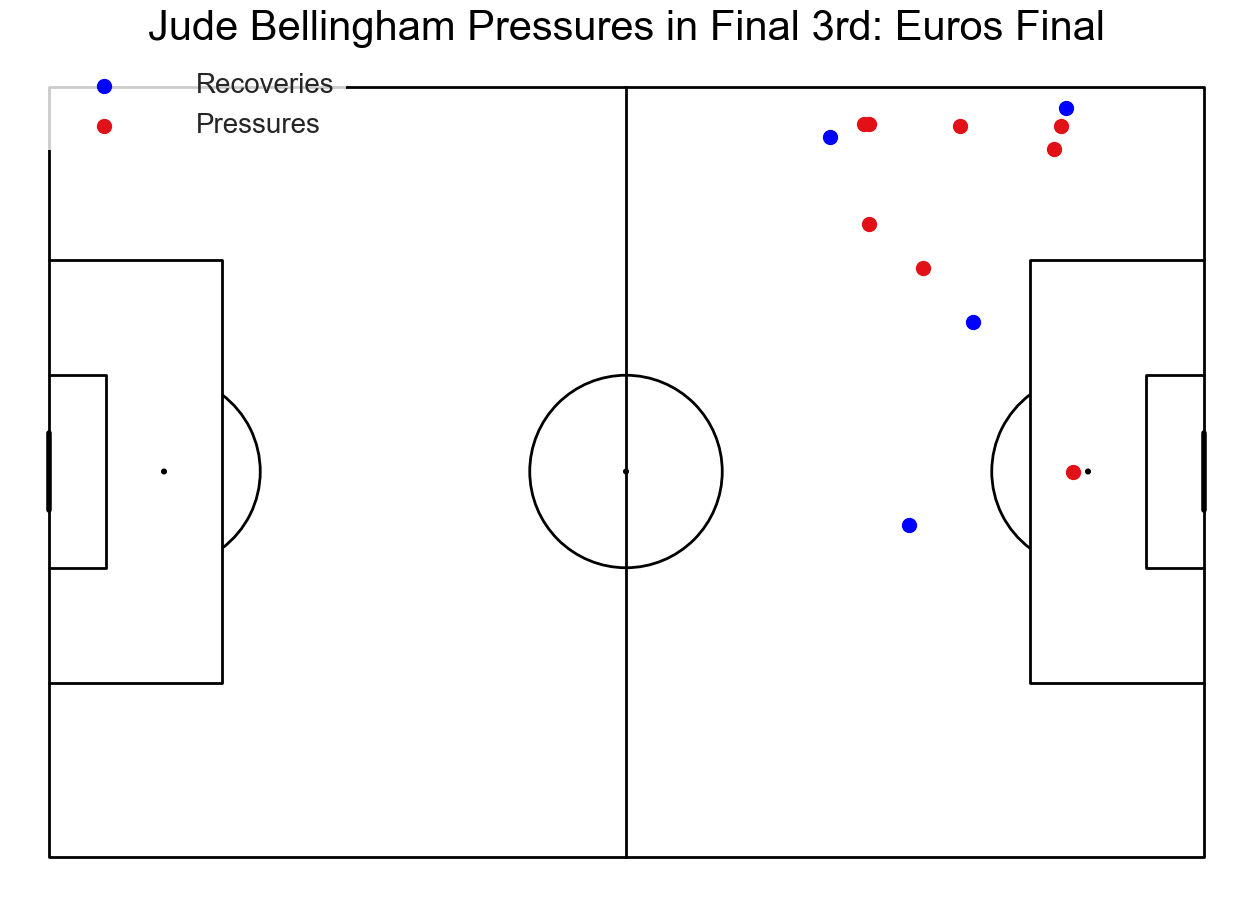

In [463]:
#visualise for a given player
player_name="Jude Bellingham"

player_recoveries=ball_recovery[(ball_recovery.player==player_name)]
player_pressures=ball_pressure[(ball_pressure.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

ax.scatter(player_recoveries.x, player_recoveries.y, 
           color=carry_colour, s=100, zorder=2, label="Recoveries")

ax.scatter(player_pressures.x, player_pressures.y, 
           color=pass_colour, s=100, zorder=2, label="Pressures")

#plot the passes
#pitch.arrows(player_passes.x, player_passes.y,
#player_passes.pass_end_x, player_passes.pass_end_y, width=3,
#headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
#pitch.arrows(player_carries.x, player_carries.y,
#player_carries.carry_end_x, player_carries.carry_end_y, width=3,
#headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Pressures in Final 3rd: Euros Final', fontsize=30,color='black')